# G2M insight for Cab Investment firm

## Made by: Shalu Saroj
### LISUM23 : 30
G2M Case Study
Project detail:
You have been provided with multiple data sets that contains information on 2 cab companies. Each file (data set) provided represents different aspects of the customer profile. XYZ is interested in using your actionable insights to help them identify the right company to make their investment.

The outcome of your delivery will be a presentation to XYZ’s Executive team. This presentation will be judged based on the visuals provided, the quality of your analysis and the value of your recommendations and insights.

Data Set:
You have been provided 4 individual data sets. Time period of data is from 31/01/2016 to 31/12/2018.

Below are the list of datasets which are provided for the analysis:

Cab_Data.csv – this file includes details of transaction for 2 cab companies

Customer_ID.csv – this is a mapping table that contains a unique identifier which links the customer’s demographic details

Transaction_ID.csv – this is a mapping table that contains transaction to customer mapping and payment mode

City.csv – this file contains list of US cities, their population and number of cab users

You should fully investigate and understand each data set.

Review the Source Documentation
Understand the field names and data types
Identify relationships across the files
Field/feature transformations
Determine which files should be joined versus which ones should be appended
Create master data and explain the relationship
Identify and remove duplicates
Perform other analysis like NA value and outlier detection
im

### import required Library

In [83]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Read the Dataset

In [180]:
cab_data = pd.read_csv('/Users/shalu/Downloads/DataSets-main/Cab_Data.csv')
customer_data = pd.read_csv('/Users/shalu/Downloads/DataSets-main/Customer_ID.csv')
city_data=pd.read_csv('/Users/shalu/Downloads/DataSets-main/city.csv')
tran_data=pd.read_csv('/Users/shalu/Downloads/DataSets-main/Transaction_ID.csv')

In [181]:
print("shape of Cab_Data", cab_data.shape)
print("shape of customer_data", customer_data.shape)
print("shape of city_data", city_data.shape)
print("shape of tran_data", tran_data.shape)

shape of Cab_Data (359392, 7)
shape of customer_data (49171, 4)
shape of city_data (20, 3)
shape of tran_data (440098, 3)


In [182]:
from datetime import datetime, timedelta
def to_date_format(n):
    date_str =(datetime(1899,12,30) + timedelta(n-1)).strftime("%d-%m-%Y")
    date_date =  datetime.strptime(date_str, "%d-%m-%Y")
    return date_date

In [183]:
cab_data['Date of Travel'] = cab_data['Date of Travel'].apply(lambda x:to_date_format(x))


In [184]:
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-06,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-02,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [185]:
profit = cab_data['Price Charged']-cab_data['Cost of Trip']
cab_data['profit']=profit

## Data Cleaning and visualization.

[Text(0.5, 1.0, 'Profit vs City')]

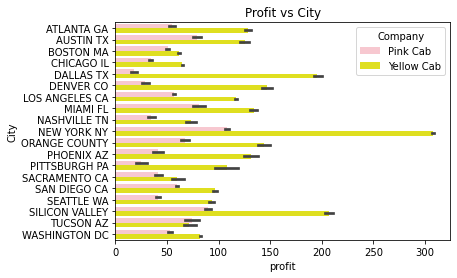

In [186]:
sns.barplot(x='profit',
            y='City', 
            hue='Company', 
        
            data = cab_data, 
            orient='h',
            palette=['pink','yellow']).set(title='Profit vs City')

[Text(0.5, 1.0, 'Price charged vs Distance')]

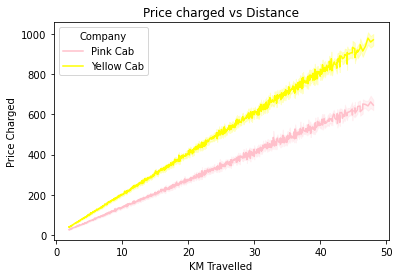

In [177]:
sns.lineplot(x='KM Travelled',
            y='Price Charged', 
            hue='Company', 
        
            data = cab_data, 
            palette=['pink','yellow']).set(title='Price charged vs Distance')

In [95]:
cab_data.dtypes

Transaction ID             int64
Date of Travel    datetime64[ns]
Company                   object
City                      object
KM Travelled             float64
Price Charged            float64
Cost of Trip             float64
profit                   float64
month                      int64
dtype: object

In [96]:
date= cab_data['Date of Travel']

In [97]:
cab_data['month'] = pd.DatetimeIndex(cab_data['Date of Travel']).month


In [98]:
cab_data['month']

0         1
1         1
2         1
3         1
4         1
         ..
359387    1
359388    1
359389    1
359390    1
359391    1
Name: month, Length: 359392, dtype: int64

[Text(0.5, 1.0, 'no. of Transaction vs month')]

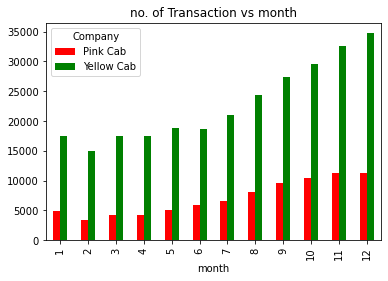

In [178]:
#Month vs Transaction Count
cab_data.groupby(by=['month','Company'])['Transaction ID'].count().unstack().plot(kind='bar', color=['r', 'g']).set(title='no. of Transaction vs month')

In [100]:
customer_data.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


<AxesSubplot:xlabel='Gender', ylabel='Customer ID'>

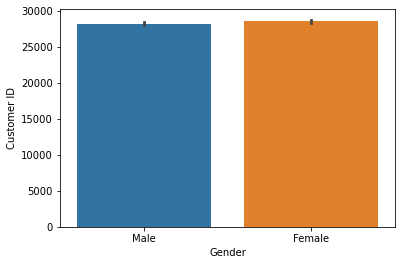

In [101]:
sns.barplot(x='Gender', y='Customer ID', data= customer_data)

<AxesSubplot:xlabel='Age', ylabel='Customer ID'>

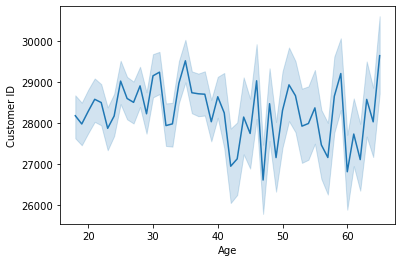

In [102]:
sns.lineplot(x='Age', y='Customer ID', ci= 75, data= customer_data)

In [104]:
cab_data.shape

(359392, 9)

In [105]:
tran_data.shape

(440098, 3)

In [106]:
customer_data.shape

(49171, 4)

# Creating Master Data

In [107]:
data1=pd.merge(cab_data,tran_data,on='Transaction ID',how='left')


In [108]:
data1.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,profit,month,Customer ID,Payment_Mode
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315,1,29290,Card
1,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666,1,27703,Card
2,10000013,2016-01-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568,1,28712,Cash
3,10000014,2016-01-06,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798,1,28020,Cash
4,10000015,2016-01-02,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844,1,27182,Card


In [109]:
master_data=pd.merge(data1,customer_data,on='Customer ID',how='left')


In [110]:
master_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,profit,month,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315,1,29290,Card,Male,28,10813
1,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666,1,27703,Card,Male,27,9237
2,10000013,2016-01-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568,1,28712,Cash,Male,53,11242
3,10000014,2016-01-06,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798,1,28020,Cash,Male,23,23327
4,10000015,2016-01-02,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844,1,27182,Card,Male,33,8536


In [111]:
master_data.shape

(359392, 14)

In [112]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Date of Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   profit              359392 non-null  float64       
 8   month               359392 non-null  int64         
 9   Customer ID         359392 non-null  int64         
 10  Payment_Mode        359392 non-null  object        
 11  Gender              359392 non-null  object        
 12  Age                 359392 non-null  int64         
 13  Income (USD/Month)  359392 no

In [78]:
master_data.isna().sum().sum()

0

## No null value found in master data.

In [113]:
master_data['year'] = pd.DatetimeIndex(master_data['Date of Travel']).year


In [114]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Date of Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   profit              359392 non-null  float64       
 8   month               359392 non-null  int64         
 9   Customer ID         359392 non-null  int64         
 10  Payment_Mode        359392 non-null  object        
 11  Gender              359392 non-null  object        
 12  Age                 359392 non-null  int64         
 13  Income (USD/Month)  359392 no

In [115]:
def checkAgeRange(age):
    las_dig=age%10
    range_age=str.format('{0}-{1}',age-las_dig,((age-las_dig)+10))
    return range_age

In [116]:
dataFrame= pd.DataFrame(data=master_data)
dataFrame['AgeGroup']=dataFrame['Age'].apply(checkAgeRange)
print(dataFrame)

        Transaction ID Date of Travel     Company           City  \
0             10000011     2016-01-07    Pink Cab     ATLANTA GA   
1             10000012     2016-01-05    Pink Cab     ATLANTA GA   
2             10000013     2016-01-01    Pink Cab     ATLANTA GA   
3             10000014     2016-01-06    Pink Cab     ATLANTA GA   
4             10000015     2016-01-02    Pink Cab     ATLANTA GA   
...                ...            ...         ...            ...   
359387        10440101     2018-01-07  Yellow Cab  WASHINGTON DC   
359388        10440104     2018-01-03  Yellow Cab  WASHINGTON DC   
359389        10440105     2018-01-04  Yellow Cab  WASHINGTON DC   
359390        10440106     2018-01-04  Yellow Cab  WASHINGTON DC   
359391        10440107     2018-01-01  Yellow Cab  WASHINGTON DC   

        KM Travelled  Price Charged  Cost of Trip   profit  month  \
0              30.45         370.95      313.6350  57.3150      1   
1              28.62         358.52      334.

In [117]:
master_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,profit,month,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),year,AgeGroup
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315,1,29290,Card,Male,28,10813,2016,20-30
1,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666,1,27703,Card,Male,27,9237,2016,20-30
2,10000013,2016-01-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568,1,28712,Cash,Male,53,11242,2016,50-60
3,10000014,2016-01-06,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798,1,28020,Cash,Male,23,23327,2016,20-30
4,10000015,2016-01-02,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844,1,27182,Card,Male,33,8536,2016,30-40


[Text(0.5, 1.0, 'Price Charged for Genders')]

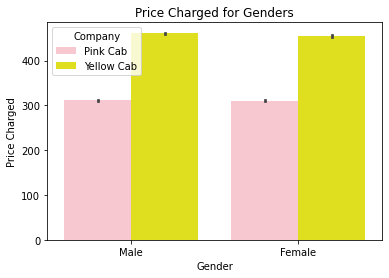

In [160]:
sns.barplot(x='Gender',
            y='Price Charged', 
            hue='Company', 
            data = master_data, 
            palette=['pink','yellow']). set(title="Price Charged for Genders")

[Text(0.5, 1.0, 'Monthly profits')]

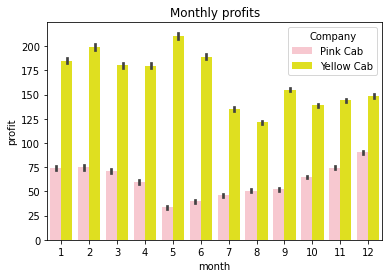

In [159]:
sns.barplot(x='month',
            y='profit', 
            hue='Company', 
        
            data = master_data, 
            palette=['pink','yellow']).set(title="Monthly profits")

In [164]:
#Mean profits for both the companies
mean_p = master_data[(master_data.Company=='Pink Cab')&(master_data.City=='DALLAS TX')].groupby(['year','month']).profit.mean()
mean_y = master_data[(master_data.Company=='Yellow Cab')&(master_data.City=='DALLAS TX')].groupby(['year','month']).profit.mean()


In [165]:
#Making datasets for avg monthly profit for both the companies
data_p = pd.DataFrame({'Profit_pink':mean_p.values,'Tran_pink':master_data[master_data.Company=='Pink Cab'].groupby(['year','month'])['Transaction ID'].count().values})
data_y = pd.DataFrame({'Profit_yellow':mean_y.values,'Tran_yellow':master_data[master_data.Company=='Yellow Cab'].groupby(['year','month'])['Transaction ID'].count().values})


[Text(0.5, 1.0, 'Monthly Avg profit for YELLOW cab')]

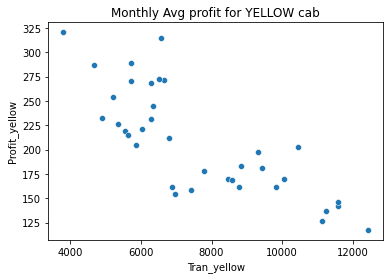

In [166]:
sns.scatterplot(x='Tran_yellow', y ='Profit_yellow', data= data_y).set(title="Monthly Avg profit for YELLOW cab")

## We see that it is slightly negatively correlated for YELLOW cabs.
## It means increase in transacion leads to decrease in profits.

[Text(0.5, 1.0, 'Monthly Avg profit for PINK cab')]

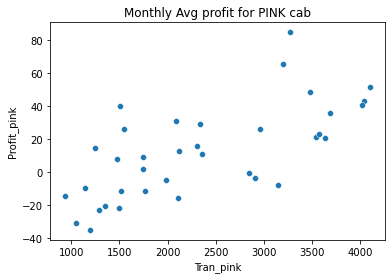

In [167]:
sns.scatterplot(x='Tran_pink', y ='Profit_pink', data= data_p).set(title="Monthly Avg profit for PINK cab")

## We see that it is slightly positively correlated for PINK cabs.
## It means increase in transacion leads to increase in profits.

In [168]:
data_p.corr()

,Profit_pink,Tran_pink
Profit_pink,1.000000,0.678774
Tran_pink,0.678774,1.000000


In [169]:
data_y.corr()

,Profit_yellow,Tran_yellow
Profit_yellow,1.000000,-0.791308
Tran_yellow,-0.791308,1.000000


# Hypothesis Testing

## Null Hypothesis: Profit remain the same regarding Gender for both Yellow Cab & Pink Cab

In [170]:
f = master_data[(master_data.Gender=='Female')&(master_data.Company=='Yellow Cab')].groupby('Transaction ID').profit.mean()
m = master_data[(master_data.Gender=='Male')&(master_data.Company=='Yellow Cab')].groupby('Transaction ID').profit.mean()
print(f.shape[0],m.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(f.values,b=m.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that there is a statistical difference')
else:
    print('We fail to null hypothesis that there is no statistical difference')
    
print('P value is ', p_value)

116000 158681
We accept alternate hypothesis that there is a statistical difference
P value is  6.060473042494144e-25


### Yellow Cab: There is difference in profit between Male and Female customers

In [171]:
f = master_data[(master_data.Gender=='Female')&(master_data.Company=='Pink Cab')].groupby('Transaction ID').profit.mean()
m = master_data[(master_data.Gender=='Male')&(master_data.Company=='Pink Cab')].groupby('Transaction ID').profit.mean()
print(f.shape[0],m.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(f.values,b=m.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that there is a statistical difference')
else:
    print('We fail to reject null hypothesis that there is no statistical difference')
    
print('P value is ', p_value)

37480 47231
We fail to reject null hypothesis that there is no statistical difference
P value is  0.11515305900425798


### Pink Cab: There is no difference in profit between Male and Female customers

## Null Hypothesis: Profit remain the same regarding age for both Yellow Cab & Pink Cab

In [172]:
#Yellow Cab
y = master_data[(master_data.Age<=50)&(master_data.Company=='Yellow Cab')].groupby('Transaction ID').profit.mean()
o = master_data[(master_data.Age>50)&(master_data.Company=='Yellow Cab')].groupby('Transaction ID').profit.mean()
print(y.shape[0],o.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(y.values,b=o.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that theres a difference')
else:
    print('We fail to reject null hypothesis that there is no statistical difference')
    
print('P value is ', p_value)

231480 43201
We accept alternate hypothesis that theres a difference
P value is  6.494256817799368e-09


### Yellow Cab: There is difference in profit between younger and older customers.

In [173]:
#Pink Cab
y = master_data[(master_data.Age<=50)&(master_data.Company=='Pink Cab')].groupby('Transaction ID').profit.mean()
o = master_data[(master_data.Age>50)&(master_data.Company=='Pink Cab')].groupby('Transaction ID').profit.mean()
print(y.shape[0],o.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(y.values,b=o.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that theres a difference')
else:
    print('We fail to reject null hypothesis that there is no statistical difference')
    
print('P value is ', p_value)

71228 13483
We fail to reject null hypothesis that there is no statistical difference
P value is  0.32817487547980695


### Pink Cab: There is no difference in profit between younger and older customers.

In [174]:
master_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,profit,month,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),year,AgeGroup
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315,1,29290,Card,Male,28,10813,2016,20-30
1,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666,1,27703,Card,Male,27,9237,2016,20-30
2,10000013,2016-01-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568,1,28712,Cash,Male,53,11242,2016,50-60
3,10000014,2016-01-06,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798,1,28020,Cash,Male,23,23327,2016,20-30
4,10000015,2016-01-02,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844,1,27182,Card,Male,33,8536,2016,30-40


In [175]:
master_data.to_csv('master_data.csv',index = False)